Problems and Questions:

1)     What were the most popular  girl’s and boy’s names in the last decade (2009-2018)? Can you notice any trends in names?

2)     How many girls and how many boys were born between 1990 and 2000?

3)     Can you observe the trends in the number of births over all years? Are these trends different between girls and boys? Provide relevant charts.

4)     Comment on statistics for your name. Give as many insights as possible.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid')

Creating a function to merge all the .txt files into one panda data frame

In [2]:
# read the content of the first file
column_heads = ['name', 'gender', 'counts']
ba80 =pd.read_csv('./data/names/yob1880.txt',encoding = "ISO-8859-1", header = None, names = column_heads)
ba80['yob'] = 1880
ba80.head()

,name,gender,counts,yob
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [3]:
#function to read and combine all txt files. It returns one data frame and all the rows which were read.

def read_all_files(baby):
    column_heads = ['name', 'gender', 'counts']
    total_rows = len(baby.index)
    for year in range(1881,2019):
        path = './/data//names//yob' + str(year) + '.txt'
        bab = pd.read_csv(path,encoding = "ISO-8859-1", header = None, names = column_heads)
        bab['yob'] = year
        total_rows += len(bab.index)
        baby = baby.append(bab,ignore_index=False)
    return baby,total_rows 

In [4]:
#check if total number of rows from each files equals to the total number of rows in a panda data frame
baby_dt, rows = read_all_files(ba80)
print(rows)
print(len(baby_dt.index))


1957046
1957046


In [5]:
rows == len(baby_dt.index)

True

1. What were the most popular  girl’s and boy’s names in the last decade (2009-2018)? 
Can you notice any trends in names?

In [6]:
baby_dt.head()

,name,gender,counts,yob
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [7]:
baby_dt.isnull().any()

name      False
gender    False
counts    False
yob       False
dtype: bool

In [8]:
baby_dt.describe()

,counts,yob
count,1.957046e+06,1.957046e+06
mean,1.796856e+02,1.975563e+03
std,1.522804e+03,3.419121e+01
min,5.000000e+00,1.880000e+03
25%,7.000000e+00,1.952000e+03
50%,1.200000e+01,1.985000e+03
75%,3.200000e+01,2.004000e+03
max,9.968900e+04,2.018000e+03


All names sorted in descending order for the decade (2009-2018)

In [9]:
all_names = baby_dt.query("2009<=yob<=2018").groupby(['name','gender']).sum().sort_values(by='counts',ascending = False)
all_names.reset_index(inplace=True)
all_names = all_names.drop('yob', axis=1)
all_names.head()

,name,gender,counts
0,Emma,F,195305
1,Sophia,F,183930
2,Olivia,F,183016
3,Noah,M,180904
4,Isabella,F,179015


a) overall most popular 10 names  for boys for the entire decade

In [10]:
all_names.query("gender == 'M'")[:10]

,name,gender,counts
3,Noah,M,180904
5,Jacob,M,173195
6,William,M,163811
7,Liam,M,161558
8,Ethan,M,157359
10,Mason,M,156764
11,Michael,M,152983
12,Alexander,M,148711
13,Daniel,M,140504
14,James,M,140268


b) Overall most popular 10 names for girls for the entire decade

In [11]:
all_names.query("gender == 'F'")[:10]

,name,gender,counts
0,Emma,F,195305
1,Sophia,F,183930
2,Olivia,F,183016
4,Isabella,F,179015
9,Ava,F,156852
21,Mia,F,127727
22,Emily,F,124501
23,Abigail,F,123643
34,Madison,F,107153
38,Elizabeth,F,96867


c) Analysing the trends on names; I selected the top 1500 popular names in the decade

-checked if there is any relationship between the last letter and number of births

-checked the trend on how the same name was used by both genders.

In [12]:
#extracting top 1500 unique popular names for the last decade
last_decade = baby_dt.query("2009<=yob<=2018").groupby(['yob','name','gender']).sum().sort_values(by='counts',ascending = False)
last_decade.reset_index(inplace=True)
last_decade.head()

,yob,name,gender,counts
0,2010,Isabella,F,22913
1,2012,Sophia,F,22313
2,2009,Isabella,F,22306
3,2010,Jacob,M,22127
4,2011,Sophia,F,21842


In [13]:
top1500 = last_decade[:11730]
len(top1500['name'].unique())

1500

In [14]:
#adding a last letter column to top1500
top1500['last_letter'] = [x.strip()[-1] for x in top1500['name']]
top1500.head()

C:\Users\godfr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,yob,name,gender,counts,last_letter
0,2010,Isabella,F,22913,a
1,2012,Sophia,F,22313,a
2,2009,Isabella,F,22306,a
3,2010,Jacob,M,22127,b
4,2011,Sophia,F,21842,a


In [15]:
letters = top1500.pivot_table('counts',columns = ['gender','yob'], aggfunc = sum, index = 'last_letter').fillna(0)
letters.head()

gender              F                                                    \
yob              2009      2010      2011      2012      2013      2014   
last_letter                                                               
a            478147.0  463426.0  441607.0  441114.0  439681.0  452706.0   
b                 0.0       0.0       0.0       0.0       0.0       0.0   
c               779.0     804.0     975.0    1082.0    1167.0    1219.0   
d               615.0       0.0       0.0       0.0       0.0       0.0   
e            221044.0  215995.0  219384.0  219515.0  224654.0  228545.0   

gender                                                     M           \
yob              2015      2016      2017      2018     2009     2010   
last_letter                                                             
a            451460.0  449997.0  447010.0  447724.0  22054.0  19299.0   
b                 0.0       0.0       0.0       0.0  36937.0  37120.0   
c              1112.0    1135.0    1061.0    1007.0  20931.0  20143.0   
d                 0.0       0.0       0.0       0.0  32207.0  30913.0   
e            224916.0  225066.0  212327.0  205074.0  94447.0  88736.0   

gender                                                                      \
yob             2011     2012     2013     2014     2015     2016     2017   
last_letter                                                                  
a            17897.0  17311.0  17860.0  18539.0  18771.0  19399.0  18969.0   
b            34641.0  32774.0  31332.0  29510.0  27820.0  24725.0  22402.0   
c            20075.0  21089.0  20912.0  20664.0  20029.0  18696.0  17280.0   
d            29530.0  28495.0  28530.0  30363.0  30170.0  28015.0  28114.0   
e            86838.0  87434.0  91081.0  92168.0  86738.0  85759.0  82256.0   

gender                
yob             2018  
last_letter           
a            19484.0  
b            20605.0  
c            16559.0  
d            26972.0  
e            79908.0

In [16]:
#normalizing counts
letter=letters/letters.sum()

<AxesSubplot:title={'center':'Male'}, xlabel='last_letter'>

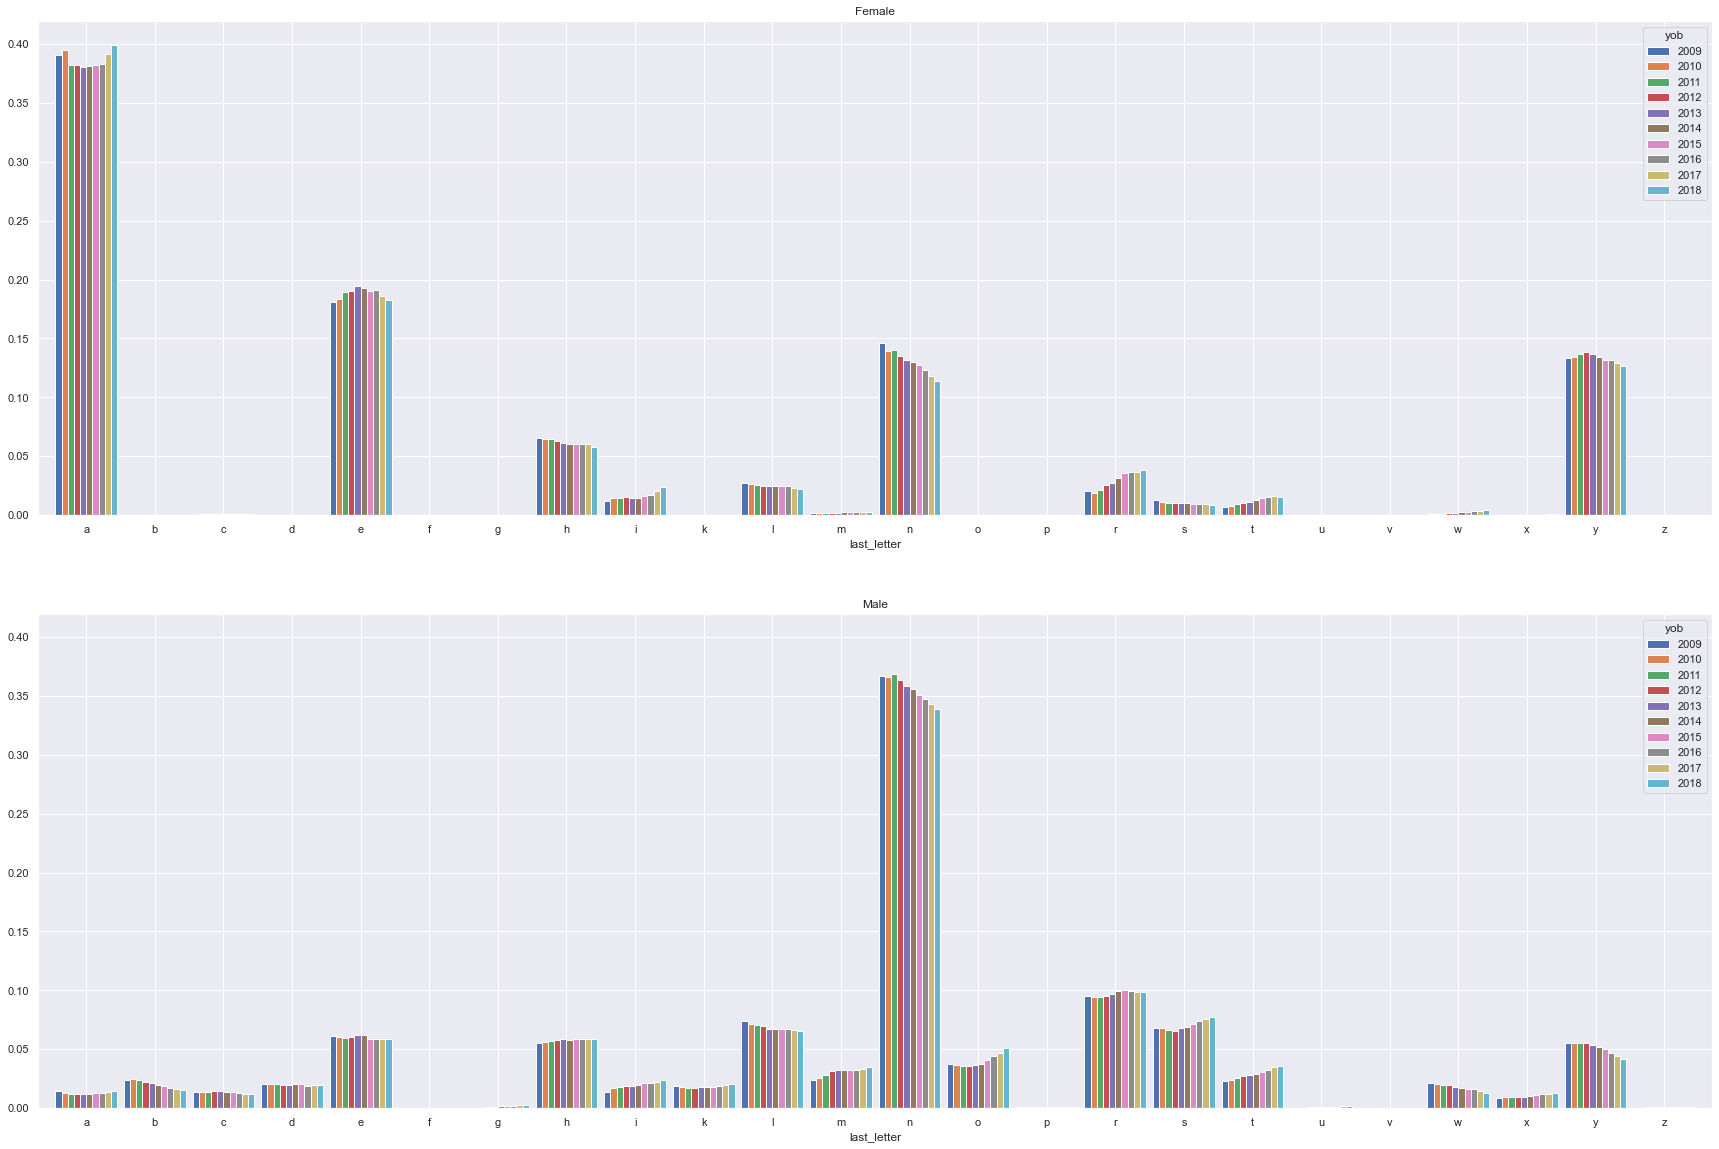

In [17]:
fig,ax = plt.subplots(2,1,figsize = (30,20), sharey=True)
letter['F'].plot(kind='bar', rot=0, ax=ax[0], title='Female',width = 0.9)
letter['M'].plot(kind='bar', rot=0, ax=ax[1], title='Male',width = 0.9)

The plots above indicates that, names ending with letter 'a' was most popular for females while the one ending with letter 'n' was the most popular for men. Let's observe how the popularity of top 3 letters varied per year for the last decade

In [18]:
#trend for most popular boys name ending with letters n, r and s over the past decade
nrsb = letter.loc[['n','r','s'],'M'].T
nrsb.head()

last_letter,n,r,s
yob,,,
2009,0.366809,0.095483,0.068101
2010,0.365865,0.094781,0.068098
2011,0.368268,0.094370,0.066133
2012,0.363689,0.094930,0.065958
2013,0.358431,0.097231,0.067783


<AxesSubplot:title={'center':'Trending for boys letters n,r and s'}, xlabel='yob'>

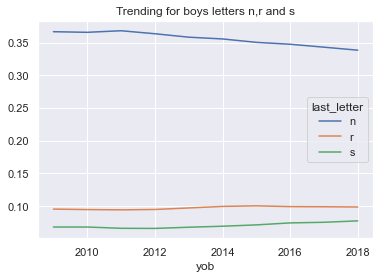

In [19]:
nrsb.plot(title = 'Trending for boys letters n,r and s')

We notice that names ending with letter 'n' were loosing popularity from 2011 while letters 'r' and 's' were mantaining their popularity.

In [20]:
#trend for most popular boys name ending with letters n, r and s over the past decade
nrsg = letter.loc[['a','e','n'],'F'].T
nrsg.head()

last_letter,a,e,n
yob,,,
2009,0.390899,0.180710,0.146376
2010,0.394362,0.183806,0.139301
2011,0.381949,0.189747,0.140636
2012,0.381693,0.189945,0.134926
2013,0.380137,0.194230,0.132112


<AxesSubplot:title={'center':'Trending for boys letters a,e and n'}, xlabel='yob'>

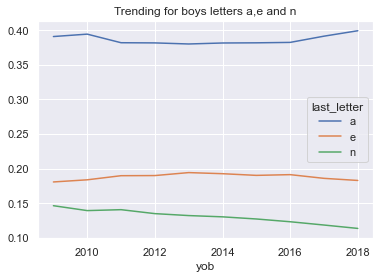

In [21]:
nrsg.plot(title = 'Trending for boys letters a,e and n')

We notice that from 2016 parents popularized the use of letter a as the last name to their babies, while letters e and n were loosing their popularity.

In [22]:
#which last letter constructed many different names among the top 1500 names in a decade?
uniq_last_letter = top1500['last_letter'].unique()
un = np.array([len(top1500[top1500['last_letter'] == letter]['name'].unique()) for letter in uniq_last_letter])
dfn = pd.DataFrame({'letter':uniq_last_letter, 'Total names':un}).sort_values(by='Total names',ascending = False)
dfn.head()

,letter,Total names
2,n,342
0,a,307
11,e,220
7,y,141
4,h,73


Let's check on how the same name was used by both genders for the last decade.

In [23]:
females = top1500.query("gender=='F'")[['name','yob']]
females.head()

,name,yob
0,Isabella,2010
1,Sophia,2012
2,Isabella,2009
4,Sophia,2011
5,Sophia,2013


In [24]:
males = top1500.query("gender == 'M'")[['name','yob']]
males.head()

,name,yob
3,Jacob,2010
6,Jacob,2009
12,Jacob,2011
14,Ethan,2009
15,Liam,2018


In [25]:
name_change = males.merge(females, on='name',suffixes=('_to_girl', '_to_boy'))
name_change.head()

,name,yob_to_girl,yob_to_boy
0,Jayden,2009,2009
1,Jayden,2009,2010
2,Jayden,2009,2011
3,Jayden,2009,2012
4,Jayden,2009,2013


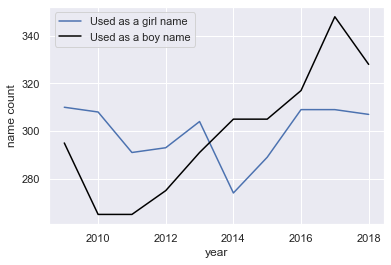

In [26]:
ax=name_change[['name','yob_to_girl']].groupby('yob_to_girl').count().plot(label = 'changed to be a girl name')
name_change[['name','yob_to_boy']].groupby('yob_to_boy').count().plot(ax=ax, c = 'black', xlabel='year', ylabel='name count')
L=plt.legend()
L.get_texts()[0].set_text('Used as a girl name')
L.get_texts()[1].set_text('Used as a boy name')

General conclusions for question 1:

1. The most overall boy's name popularity for the entire decade was NOAH.
2. The most overall girl's name popularity for the entire decade was EMMA.
3. The girls names ending with the letter 'a' were the mostly preffered by the parents.
4. The boys names ending with the letter 'n' were the mostly liked by the parents.
5. Many parents continued sharply to name their babies with names ending with letter 'a' from 2016
6. Parents started to reduce the use of letter 'n' as the last letter for their male babies since around 2011.
7. Letters 'n' and 'a' constructed the most unique different names respectively.
8. In the first half of the decade many boys names were used as girls names as well
9. In the second half of the decade many girls names were used as boys names as well

2) How many girls and how many boys were born between 1990 and 2000?

In [38]:
baby_dt.query("1990<yob<2000 & gender == 'F'")['counts'].sum()/baby_dt.query("1990<yob<2000")['counts'].sum()

0.4803453215847378

16103318 girls were born between 1990 and 2000.

In [39]:
baby_dt.query("1990<yob<2000 & gender == 'M'")['counts'].sum()/baby_dt.query("1990<yob<2000")['counts'].sum()

0.5196546784152623

17421143 boys were born between 1990 and 2000.

3. Can you observe the trends in the number of births over all years? Are these trends different between girls and boys? Provide relevant charts.

In [29]:
births_year = baby_dt.pivot_table('counts', columns=['gender'], aggfunc=sum, index = 'yob')
births_year.head()

gender,F,M
yob,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442


In [30]:
births_year['Total Births'] = births_year['F'] + births_year['M']
births_year.head()

gender,F,M,Total Births
yob,,,
1880,90994,110490,201484
1881,91953,100743,192696
1882,107847,113686,221533
1883,112319,104625,216944
1884,129019,114442,243461


<AxesSubplot:title={'center':'Total births in a year'}, xlabel='year', ylabel='births'>

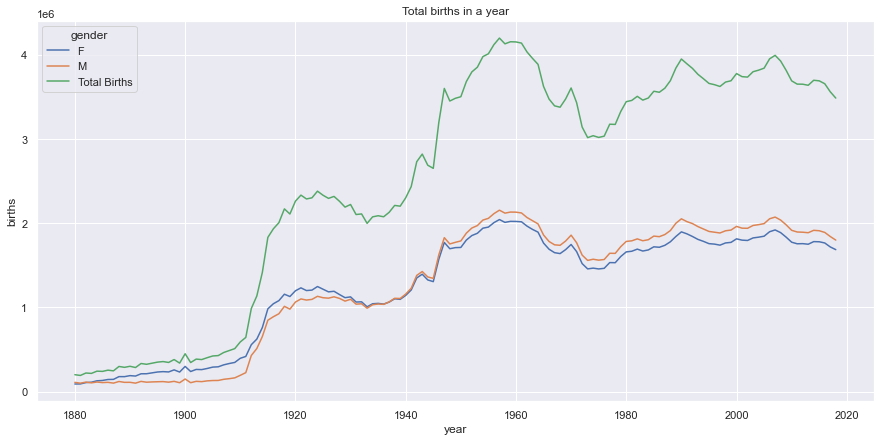

In [31]:
births_year.plot(figsize=(15,7), title='Total births in a year', xlabel = 'year', ylabel = 'births')

General Conclusions for question 3

1. Before 1940 female births outweighed male births. 
2. After 1940 males births outweighed girls births.
3. Before 1910 there were few births.
4. Between 1940 and 1980 we observe increased number of births, may be because of the increased people civilization and        industrialization. Then after the rate decreases at around 2010, may be due to availability of contraceptive pills, development of science and technology, etc.

4)     Comment on statistics for your name. Give as many insights as possible.

In [32]:
#my name, Godfrey
godfrey = baby_dt.query("name == 'Godfrey'")
godfrey.head()

,name,gender,counts,yob
1595,Godfrey,M,9,1880
1559,Godfrey,M,9,1881
1666,Godfrey,M,10,1883
1849,Godfrey,M,9,1884
1813,Godfrey,M,10,1885


In [33]:
godfrey['counts'].describe()

count    135.000000
mean      23.481481
std       14.591375
min        5.000000
25%       11.000000
50%       19.000000
75%       34.000000
max       71.000000
Name: counts, dtype: float64

In [34]:
godfrey.query("counts == 71")

,name,gender,counts,yob
6360,Godfrey,M,71,1918


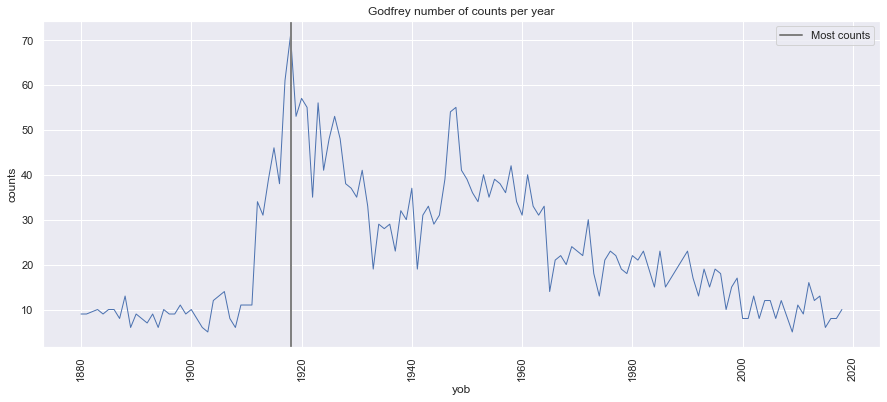

In [35]:
fig = plt.figure(figsize = (15,6))
ax=sns.lineplot(data=godfrey,x='yob',y='counts',lw=1)
plt.axvline(1918, c = 'gray', lw = 2, label = 'Most counts')
plt.title('Godfrey number of counts per year')
_=plt.xticks(rotation ='vertical')
plt.legend()

In [36]:
godfrey['counts'].sum()

3170

In [37]:
(godfrey['counts'].sum()/baby_dt['counts'].sum()) * 1000000

9.014567697803823

General notes about Godfrey in the dataset

1. Parents named their kids as Godfrey 3170 times.
2. 9 out of one million new borns were named Godfrey.
3. The most popular year for my name was 1918, where there were 71 children named Godfrey.
4. The name popularity decreased continuously from 1960s. Because parents were interested much on names ending with the letter 'n' for boys.

                                    <---------------THE END-------------->